$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$ **Submitted by: Hai Dinh, 19960331-4494, hasy@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$ **Submitted by: Christopher Meszaros, 19930707-2778,  meszaros@student.chalmers.se** <br />

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.

d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

In [1]:
## Download the datasets
!pip install -q wget
import wget
wget.download('http://www.cse.chalmers.se/research/lab/mlcourse/hw5/hw5_p1a.mat')
wget.download('http://www.cse.chalmers.se/research/lab/mlcourse/hw5/hw5_p1b.mat')
print("Download successful!")

Download successful!


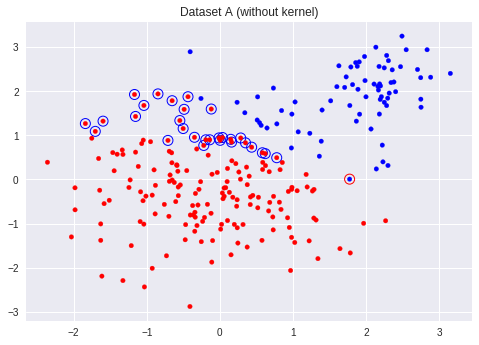

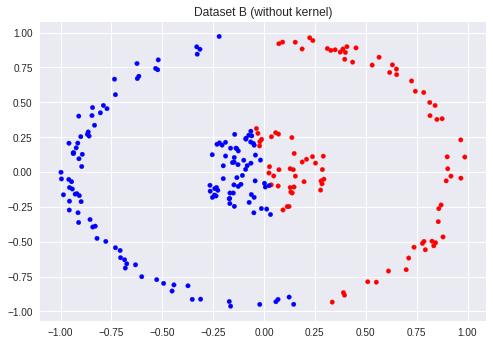

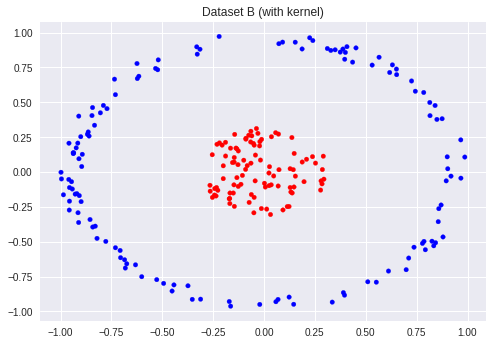

In [19]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt


def plot(X, km, displayChanged=False, title=""):
    """
    Display the plot of the data depending on the kmeans results (km).
    """
    getColors = lambda labels : ['b' if lab == 0 else 'r' for lab in labels]
    if(displayChanged):
        changed = np.where(km[:,1] != km[:,-1])
        plt.scatter(X[changed,0], X[changed,1], linewidth=1, s=100, 
                    edgecolors=getColors(km[:,1][changed]), facecolors='none')
    plt.scatter(X[:,0], X[:,1], c=getColors(km[:,-1]), s=20)
    plt.title(title)
    plt.show()
    
    
def rbf_kernel(x1, x2, sigma):
    """
    Returns the Gaussian RBF kernel (dot product) between samples x1 and x2. 
    """
    return np.exp(-1/(2*sigma**2) * np.dot(x1-x2, x1-x2))
    

def kmeans(X, K):
    """
    Returns a matrix of class labels, where the ij-entry represents the label 
    assignment of the ith sample during the jth iteration.
    """
    ## Helper function to assign label to the sample x using the current centroids. 
    def assign(x, Mu):
        distances = np.sum(np.square(x-Mu), axis=1)
        return np.argmin(distances)
    
    ## Helper function to find the centroid for a bunch of points.
    def mean(points):
        return np.sum(points, axis=0) / points.shape[0]
    
    ## Initialization of variables (including the initial random centroids).
    N = X.shape[0]
    res = np.empty((N,0))
    indices = np.random.randint(N, size=K)
    Mu = X[indices,:]
    
    ## Improve the centroids until convergence
    while(True):
        pred = np.array([assign(x, Mu) for x in X])
        Mu = np.array([mean(X[pred == k]) for k in range(K)])
        if(res.size > 0 and np.all(pred == res[:,-1])):
            break
        res = np.append(res, np.array([pred]).T, axis=1)
    return res
    
    
def kmeans_kernel(X, K, sigma):
    """
    Returns a matrix of class labels, where the ij-entry represents the label 
    assignment of the ith sample during the jth iteration.
    Let N denote the number of samples.
    Let P denote an N-by-N kernel matrix containing all possible inner products of X.
    Let Zk denote an N-by-1 binary vector indicating which of the points have label k.
    """
    ## Initialize some global variables (including the kernel matrix P).
    N = X.shape[0]
    res = np.empty((N,0))
    P = np.array([rbf_kernel(X[i], X[j], sigma)
                  for j in range(N)
                  for i in range(N)]).reshape((N,N))
    
    ## Helper function to assign label to the nth sample using the current predictions.
    def assign(n, pred):
        distances = np.array([dist(n, pred == k) for k in range(K)])
        return np.argmin(distances)
    
    ## Helper function to compute distance between the nth sample and the kth centroid.
    def dist(n, Zk):
        Nk = sum(Zk)
        a = P[n,n]
        b = np.sum(Zk * P[n,:]) / Nk
        c = np.sum(P * np.outer(Zk,Zk)) / Nk**2
        return(a - 2*b + c)
    
    ## Initialize the centroids by randomly assigning label to each sample.
    pred = np.random.randint(K, size=N)

    ## Improve the centroids until convergence
    while(True):
        pred = np.array([assign(n, pred) for n in range(N)])
        if(res.size > 0 and np.all(pred == res[:,-1])):
            break
        res = np.append(res, np.array([pred]).T, axis=1)
    return res


## Dataset A (without kernel)
X = scipy.io.loadmat('hw5_p1a.mat')['X']
km = kmeans(X, 2)
plot(X, km, title="Dataset A (without kernel)", displayChanged=True)

## Dataset B (without kernel)
X = scipy.io.loadmat('hw5_p1b.mat')['X']
km = kmeans(X, 2)
plot(X, km, title="Dataset B (without kernel)")

## Dataset B (with kernel)
km = kmeans_kernel(X, 2, 0.2)
plot(X, km, title="Dataset B (with kernel)")